In [71]:
from selenium import webdriver
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import pandas as pd
import time
import matplotlib.pyplot as plt

In [4]:
#code by pythonjar from stackoverflow, not me. Goal is to remove notifications on chrome
chrome_options = webdriver.ChromeOptions()
prefs = {"profile.default_content_setting_values.notifications" : 2}
chrome_options.add_experimental_option("prefs",prefs)

#start the webdriver
driver = webdriver.Chrome(chrome_options=chrome_options)

<ipython-input-4-9544aa0bebb0>:7: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options=chrome_options)


In [34]:
url = "https://www.ouedkniss.com/annonces/index.php?c=vetements&wilaya=%2Coran&gros=2&p=1" #the website we want to scrape

driver.get(url) #enter the website

# Get every item link


In [35]:
time.sleep(3)
links=[]
NotEmpty=True 
while NotEmpty:
    
    NotEmpty=False
    elements = driver.find_elements_by_xpath('//li[contains(@class, "annonce_titre")]/a') #all items on a single page
    
    
    
    for ele in elements:
        links.append(ele.get_attribute('href')) # add items to list
    try:
        next_buttons = driver.find_elements_by_xpath('//div[contains(@id,"divPages")]/a[contains(@class,"page_arrow")]') #get list of buttons
        
        for next_button in next_buttons:
            
            if(next_button.text[0]=='>'): #case button is a next page button
                time.sleep(5)
                
                next_button.click() #click to go next page
                NotEmpty=True 
            
        
    except:   
        pass
    
    EOP = driver.find_elements_by_xpath('//div[contains(@class, "fin_resultat")]')
    for x in EOP:
        NotEmpty=False
time.sleep(6)    

In [37]:
links ##prints the list of all links of items

['https://www.ouedkniss.com/%D8%A8%D8%A7%D8%B3%D9%83%D8%A7%D8%AA-%D8%A8%D8%A7%D9%84%D8%AC%D9%85%D9%84%D8%A9-oran-chlef-laghouat-adrar-oum-el-bouaghi-batna-bejaia-biskra-bechar-blida-bouira-tamanrasset-tebessa-tlemcen-tiaret-tizi-ouzou-alger-centre-djelfa-jijel-setif-saida-skikda-sidi-bel-abbes-annaba-guelma-constantine-medea-mostaganem-msila-mascara-ouargla-bayadh-bordj-bou-arreridj-boumerdes-taref-tindouf-tissemsilt-oued-khenchela-souk-ahras-tipaza-mila-ain-defla-naama-temouchent-ghardaia-relizane-algerie-v%C3%AAtements-d27597436?utm_medium=listing',
 'https://www.ouedkniss.com/h-oran-algerie-v%C3%AAtements-d27816658?utm_medium=listing',
 'https://www.ouedkniss.com/%D8%AA%D8%B1%D9%8A%D9%83%D9%88-%D8%AA%D8%A7%D8%B9-%D8%B5%D9%8A%D9%81-%D8%A8%D8%A7%D9%84%D8%AC%D9%85%D9%84%D8%A9-oran-adrar-chlef-laghouat-oum-el-bouaghi-batna-bejaia-biskra-bechar-blida-bouira-tebessa-tlemcen-tiaret-tizi-ouzou-alger-centre-djelfa-jijel-setif-saida-skikda-sidi-bel-abbes-annaba-guelma-constantine-medea-mostag

## Get details from every single item link

In [39]:
#url_site = "https://www.ouedkniss.com/" #the website we want to scrape

list_Titles=[]
list_Prices=[]

for l in links:

    driver.get(l)
    time.sleep(6)
    
    #get the title                                         
    try:
        title= driver.find_element_by_xpath('//h1')
        title_text = title.text
    except: 
        title_text="No Title"
    list_Titles.append(title_text) 
    
    #get the price                                       
    try:
        price= driver.find_element_by_xpath('//span[contains(@itemprop,"price")]')
        price_text = price.text
        var = [int(s) for s in price_text.split() if s.isdigit()] #get only the number in the String
        price_text = var[0]
    except: 
        price_text="No Price"
    list_Prices.append(price_text) 
    
    
    #############
    print(title_text) 
    print(price_text)
    print('------------------')
    time.sleep(2)

باسكات بالجملة
No Price
------------------
H
No Price
------------------
تريكو تاع صيف بالجملة
No Price
------------------
chaussures femmes
No Price
------------------
Lot 1000 pieces chausure home feme enf
No Price
------------------
جملة فقط
123
------------------
Soulier Lotto original gros
2500
------------------
Basket
1
------------------
Lot de robes
1800
------------------
Blouses
1000
------------------
Vente lot chaussures de luxe femme
2200
------------------
Pyjama joumla Livraison 48 wilaya
600
------------------
بيع حزام قفطان جملة
18000
------------------
Gros
No Price
------------------
Pyjama allaitement joumla 1er choix
1
------------------
Jeans 50 model مقطع بزاف 250 pieces
No Price
------------------
Lot 1000 pieces home femme enfant
No Price
------------------
T-shirt jack jonse original
65
------------------
Lot de vêtements enfants
1
------------------
Lingerie origine europe
No Price
------------------
basquette origine europe
No Price
------------------
بيجام

## put the info in a DataFrame 

In [41]:
df = pd.DataFrame([list_Titles,list_Prices])  
df = df.transpose() #To Transpose and make each rows as columns
df.columns=['Title', 'Price'] 

In [42]:
df

,Title,Price
0,باسكات بالجملة,No Price
1,H,No Price
2,تريكو تاع صيف بالجملة,No Price
3,chaussures femmes,No Price
4,Lot 1000 pieces chausure home feme enf,No Price
...,...,...
76,Élastique spandex lycra,No Price
77,Birkeunsotok orthopédique,1
78,Ensemble pour enfants,1300
79,chaussette homme,1


## Some Data Cleaning / visualisation

In [58]:
df2 = df.loc[(df['Price']!='No Price') & (df['Price']!=1) & (df['Price']!=111111) & (df['Price']!=123)] 
## filter out wrong or missing data

df2

,Title,Price
6,Soulier Lotto original gros,2500
8,Lot de robes,1800
9,Blouses,1000
10,Vente lot chaussures de luxe femme,2200
11,Pyjama joumla Livraison 48 wilaya,600
12,بيع حزام قفطان جملة,18000
17,T-shirt jack jonse original,65
21,بيجامات نسائية للبيع بالجمله كمية محدو,600
23,Des robes midi,250
27,Claquette ARENA -ORIGINALE-,2800


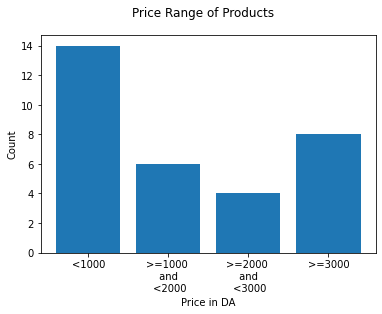

In [104]:
values=[]

values.append(len(df2.loc[df2['Price']<1000]))
values.append(len(df2.loc[(df2['Price']>=1000)&(df2['Price']<2000)]))
 
values.append(len(df2.loc[(df2['Price']>=2000)&(df2['Price']<3000)]))
values.append(len(df2.loc[df2['Price']>=3000]))

labels=["<1000",">=1000 \n and \n <2000",">=2000 \n and \n <3000",">=3000"]
 
plt.suptitle('Price Range of Products') 
plt.bar(labels,values, align='center')
plt.xlabel('Price in DA')
plt.ylabel('Count')
plt.show()